In [1]:
import cv2 as cv
import data_preparation as dp
import utils as ut
import numpy as np

In [2]:
def sortChars(chars):
    sorted_chars = sorted(chars, key=lambda x: x[1])
    sorted_chars = [c[0] for c in sorted_chars]
    return sorted_chars

In [33]:
def chars(img):
    contours, _ = cv.findContours(img, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
    characters = []
    areas = []
    for contour in contours:
        area = cv.contourArea(contour)
        if area > 10:
            x, y, w, h = cv.boundingRect(contour)
            # aspect_ratio = w / h
            if w < h :
                area =  h
                # print(cv.contourArea(contour), (w*h))
                areas.append(area)
                ch = img[y : y + h, x : x + w]
                characters.append((ch, x, area, w, h))
    avg = np.average(areas)
    std = np.std(areas) / avg
    selected_chars = []
    for char in characters:
        if char[2] >= avg and char[3] > 15:
            print(char[3])
            selected_chars.append(char)
    print("statistics")
    print(avg)
    print(std)
    return sortChars(selected_chars)

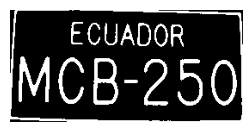

In [37]:
img = cv.imread("/home/lenin/Documents/plate7.png", cv.IMREAD_GRAYSCALE)
ut.show(img)

30
23
29
28
29
30
36
statistics
34.77777777777778
0.42655047676737023


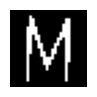

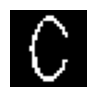

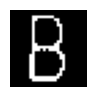

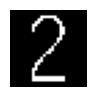

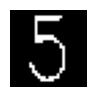

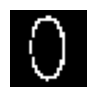

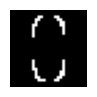

In [38]:
objects = chars(img)
for c in objects:
    c= dp.prepare_img(c)
    c = c.tolist()
    c = c[0]
    ut.show(c, dim=1)